# baca data

In [ ]:
import pandas as pd
import numpy as np
import numpy as array

#untuk split data  
from sklearn.model_selection import train_test_split  
  
#untuk kebutuhan pengujian  
import tensorflow as tf  
from tensorflow.keras.preprocessing.text import Tokenizer  
from tensorflow.keras.preprocessing.sequence import pad_sequences  
from sklearn.preprocessing import LabelEncoder  
from sklearn.preprocessing import OneHotEncoder
from tensorflow.keras.models import Sequential  
from tensorflow.keras.layers import Dense, Embedding, Activation, Dropout, Input  
from tensorflow.keras.optimizers import Adam  
from tensorflow.keras.models import Model  
from keras.layers import SimpleRNN, LSTM, Bidirectional  
from sklearn.metrics import confusion_matrix, classification_report, f1_score  
from keras import backend as K  
from keras.utils.vis_utils import plot_model

#visualisasi gambar  
import matplotlib.pyplot as plt  
import matplotlib as mpl  
import seaborn as sns  
import plotly.express as px  

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_csv("/content/drive/My Drive/Skripsi/labelisasi_dataset_new.csv")
df

,review_clean,label_negatif,label_positif
0,ya ngga cek kalo mall sedia barcodenya,1,0
1,good,0,1
2,mantap,0,1
3,best applications,0,1
4,mantap,0,1
...,...,...,...
208670,bagus,0,1
208671,tingkat servis,0,1
208672,dcek sedia vaksin faskes vaksin notif sih pedu...,1,0
208673,aplikasi guna informatif,0,1


In [ ]:
df = df.dropna(axis=0)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 201307 entries, 0 to 208674
Data columns (total 3 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   review_clean   201307 non-null  object
 1   label_negatif  201307 non-null  int64 
 2   label_positif  201307 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 6.1+ MB


# SPLIT DATA

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
y =  df[df.columns[1:]].values

In [ ]:
X = []

sentences = list(df["review_clean"])
for sen in sentences:
    X.append(sen)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# PARAMETER

In [ ]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [ ]:
# Defining the num of words
tokenizer = Tokenizer(num_words=5000)
# Fighting in the X df
tokenizer.fit_on_texts(X)

# Tokenizing Train and test

X_prep = tokenizer.texts_to_sequences(X_train)
X_test = tokenizer.texts_to_sequences(X_test)

seq = tokenizer.texts_to_sequences(X)

vocab_size = len(tokenizer.word_index) + 1

# Setting the max length of features

max_length = 21

# Ensuring the all sequences have the same length
X_train = pad_sequences(X_prep, padding='post', maxlen=max_length)
X_test = pad_sequences(X_test, padding='post', maxlen=max_length)

# EMBEDDING

In [ ]:
import gzip
from urllib.request import urlopen
from numpy import array
from numpy import asarray
from numpy import zeros

## WORD SEQUENCE

In [ ]:
word_index = tokenizer.word_index
print(tokenizer.word_index)
print('Found %s unique tokens' % len(word_index))

{'aplikasi': 1, 'ngga': 2, 'vaksin': 3, 'sertifikat': 4, 'nya': 5, 'bagus': 6, 'masuk': 7, 'bantu': 8, 'ya': 9, 'ok': 10, 'daftar': 11, 'tanggal': 12, 'buka': 13, 'kali': 14, 'muncul': 15, 'data': 16, 'susah': 17, 'tolong': 18, 'mantap': 19, 'lahir': 20, 'baik': 21, 'banget': 22, 'error': 23, 'handphone': 24, 'update': 25, 'nomor': 26, 'pakai': 27, 'nik': 28, 'good': 29, 'mudah': 30, 'cek': 31, 'mohon': 32, 'isi': 33, 'login': 34, 'kasih': 35, 'email': 36, 'kode': 37, 'bikin': 38, 'download': 39, 'sih': 40, 'ribet': 41, 'coba': 42, 'manfaat': 43, 'kalo': 44, 'peduli': 45, 'terimakasih': 46, 'lindung': 47, 'terima': 48, 'pedulilindungi': 49, 'orang': 50, 'guna': 51, 'otp': 52, 'salah': 53, 'nama': 54, 'sms': 55, 'verifikasi': 56, 'akun': 57, 'kirim': 58, 'covid': 59, 'suruh': 60, 'deh': 61, 'baru': 62, 'akses': 63, 'ulang': 64, 'oke': 65, 'sulit': 66, 'gagal': 67, 'tulis': 68, 'sesuai': 69, 'moga': 70, 'lihat': 71, 'lokasi': 72, 'cepat': 73, 'scan': 74, 'bintang': 75, 'vaksinasi': 76, '

In [ ]:
print(X[0])
print(seq[0])

ya ngga cek kalo mall sedia barcodenya
[9, 2, 31, 44, 108, 165, 1368]


## WORD EMBEDDING FASTTEXT

In [ ]:
embeddings_index = {}
fasttext_file= gzip.open(urlopen('https://dl.fbaipublicfiles.com/fasttext/vectors-crawl/cc.id.300.vec.gz'))

for line in fasttext_file:
    records = line.split()
    word = records[0].decode('utf-8')
    vector_dimensions = np.asarray(records[1:], dtype='float32')
    embeddings_index[word] = vector_dimensions
fasttext_file.close()

print('found %s word vectors' % len(embeddings_index))

found 2000000 word vectors


In [ ]:
print(embeddings_index.get('update'))
print(embeddings_index.get('sertifikat').shape)
print(embeddings_index.get('vaksin'))

[-0.0326  0.0522 -0.0375  0.0346  0.0823  0.0824  0.0424  0.021  -0.0443
 -0.0555  0.0093 -0.0802 -0.0614  0.0286  0.0341 -0.0425  0.0005  0.0591
  0.0048 -0.098  -0.0265  0.0114  0.0287  0.0618  0.0426 -0.0529  0.0113
  0.0298  0.0391  0.023   0.0636 -0.009   0.0239  0.0255 -0.0175  0.0469
 -0.0165  0.0358  0.0433  0.043   0.0585  0.0317 -0.0138 -0.0805  0.0055
  0.0063  0.0017 -0.1046  0.0246  0.02    0.0077 -0.0213  0.0098 -0.0497
  0.0718  0.0688  0.056  -0.0155 -0.0186  0.0117 -0.0358  0.0868 -0.0503
  0.0802  0.0755 -0.0113  0.005   0.086  -0.0127 -0.0069  0.0349  0.0232
 -0.0194 -0.0376  0.0277  0.042   0.0459 -0.0723  0.0351  0.0772  0.1018
 -0.0252  0.014  -0.073  -0.0309  0.0119  0.0241 -0.0509 -0.0911  0.0609
  0.0482  0.0112 -0.0416  0.0308 -0.0377 -0.0636  0.0363 -0.0322  0.0345
  0.0162 -0.0083  0.0268 -0.0007 -0.0206  0.0128 -0.0894  0.1814 -0.071
 -0.0102  0.0226 -0.0586 -0.075   0.006   0.1327 -0.0355  0.0273 -0.0144
 -0.0187  0.0609  0.0233 -0.1462 -0.0148 -0.0084 -0.

In [ ]:
embed_dim = 300

In [ ]:
embedding_matrix = np.zeros((vocab_size, embed_dim))
unidentified_words = []
for word, i in word_index.items():
    embedding_vector = embeddings_index.get(word)
    if embedding_vector is not None:
        embedding_matrix[i] = embedding_vector
    else :
      unidentified_words.append(word)
print('number of null word embeddings: %d' % np.sum(np.sum(embedding_matrix, axis=1) == 0))

number of null word embeddings: 16447


In [ ]:
print("sample words not found: ", np.random.choice(unidentified_words, 10))

sample words not found:  ['assakamuallkm' 'sartifikat' 'tiuker' 'nppmmmmo' 'hemt' 'petisah'
 'khuskn' 'capca' 'kesehattan' 'dlayani']


In [ ]:
print("Embedding Matrix shape: ", embedding_matrix.shape)

Embedding Matrix shape:  (34110, 300)


In [ ]:
embedding_matrix[1]

array([ 0.0155,  0.0517, -0.013 ,  0.0371, -0.0123, -0.018 , -0.0299,
        0.0198, -0.0203, -0.0428,  0.061 ,  0.0341,  0.0157, -0.0137,
        0.028 ,  0.0245, -0.0199,  0.0059, -0.0423, -0.022 , -0.0517,
       -0.0122, -0.0027,  0.0284, -0.0023,  0.0036, -0.0162, -0.0205,
        0.0248, -0.0048,  0.0259, -0.0072,  0.0148,  0.0026,  0.0294,
       -0.0223,  0.0101, -0.0255, -0.0033,  0.0228,  0.0357, -0.0215,
        0.0346, -0.0432,  0.0072,  0.0301, -0.0159,  0.0197,  0.0085,
       -0.0064, -0.0237, -0.0278,  0.0335, -0.0625, -0.0052,  0.044 ,
        0.0217,  0.011 ,  0.0393, -0.0409,  0.0003,  0.0188, -0.0217,
        0.0313,  0.0149, -0.0191,  0.0635,  0.0082,  0.0185,  0.0251,
        0.0115, -0.0263,  0.0046, -0.0442,  0.0299,  0.0126,  0.015 ,
       -0.0328,  0.0084, -0.0088,  0.087 ,  0.0247, -0.0088,  0.0005,
       -0.0126,  0.0577, -0.0143, -0.0503, -0.0182,  0.0317, -0.0071,
       -0.0037, -0.0142,  0.037 , -0.0334, -0.0725,  0.0122,  0.0127,
        0.0222,  0.0

In [ ]:
# Menampilkan ukuran X_train, y_train, X_test, dan y_test
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(161045, 21) (161045, 2)
(40262, 21) (40262, 2)


#pemodelan simplernn

In [ ]:
model_SimpleRNN = Sequential()

model_SimpleRNN.add(Embedding(vocab_size, 300,input_length=max_length,trainable=False))
model_SimpleRNN.add(SimpleRNN(128))
model_SimpleRNN.add(Dense(100,activation='relu'))
model_SimpleRNN.add(Dropout(0.4))
model_SimpleRNN.add(Dense(2,activation='sigmoid'))
model_SimpleRNN.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model_SimpleRNN.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 21, 300)           10233000  
                                                                 
 simple_rnn (SimpleRNN)      (None, 128)               54912     
                                                                 
 dense (Dense)               (None, 100)               12900     
                                                                 
 dropout (Dropout)           (None, 100)               0         
                                                                 
 dense_1 (Dense)             (None, 2)                 202       
                                                                 
Total params: 10,301,014
Trainable params: 68,014
Non-trainable params: 10,233,000
_________________________________________________________________


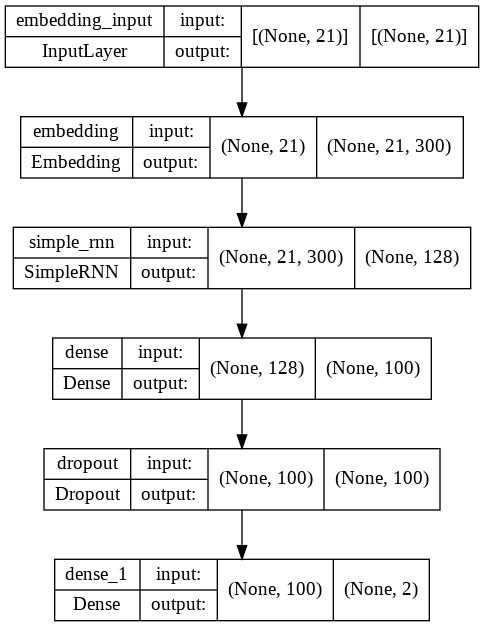

In [ ]:
from tensorflow.keras.utils import plot_model

plot_model(model_SimpleRNN, to_file='model_plot4a.png', show_shapes=True, show_layer_names=True)

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping
es_callback = EarlyStopping(monitor='val_loss', patience=3)

history_SimpleRNN = model_SimpleRNN.fit(X_train, y_train, batch_size=1024,
          epochs=100, validation_split=0.3, callbacks=[es_callback], shuffle=False)

Epoch 1/100
111/111 [==============================] - 28s 244ms/step - loss: 0.4081 - accuracy: 0.8254 - val_loss: 0.3321 - val_accuracy: 0.8639
Epoch 2/100
111/111 [==============================] - 21s 187ms/step - loss: 0.3397 - accuracy: 0.8608 - val_loss: 0.3362 - val_accuracy: 0.8610
Epoch 3/100
111/111 [==============================] - 20s 177ms/step - loss: 0.3308 - accuracy: 0.8650 - val_loss: 0.3210 - val_accuracy: 0.8676
Epoch 4/100
111/111 [==============================] - 19s 172ms/step - loss: 0.3264 - accuracy: 0.8673 - val_loss: 0.3186 - val_accuracy: 0.8688
Epoch 5/100
111/111 [==============================] - 19s 171ms/step - loss: 0.3229 - accuracy: 0.8690 - val_loss: 0.3246 - val_accuracy: 0.8676
Epoch 6/100
111/111 [==============================] - 19s 174ms/step - loss: 0.3179 - accuracy: 0.8710 - val_loss: 0.3207 - val_accuracy: 0.8688
Epoch 7/100
111/111 [==============================] - 20s 179ms/step - loss: 0.3126 - accuracy: 0.8738 - val_loss: 0.3178 -

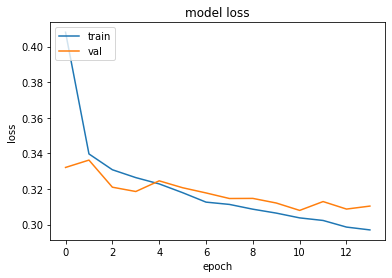

In [ ]:
plt.plot(history_SimpleRNN.history['loss'])
plt.plot(history_SimpleRNN.history['val_loss'])

plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','val'], loc='upper left')

plt.show()

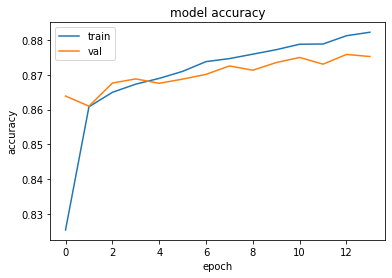

In [ ]:
plt.plot(history_SimpleRNN.history['accuracy'])
plt.plot(history_SimpleRNN.history['val_accuracy'])

plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','val'], loc='upper left')
plt.show()

In [ ]:
score_train = model_SimpleRNN.evaluate(X_train, y_train, verbose=1)
score_test = model_SimpleRNN.evaluate(X_test, y_test, verbose=1)

1259/1259 [==============================] - 5s 4ms/step - loss: 0.3143 - accuracy: 0.8725


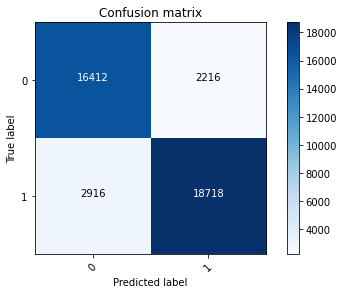

In [ ]:
# Look at confusion matrix 
import itertools  

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Predict the values from the validation dataset
Y_pred = model_SimpleRNN.predict(X_test)
# Convert predictions classes to one hot vectors 
Y_pred_classes = np.argmax(Y_pred,axis = 1) 
# Convert validation observations to one hot vectors
Y_true = np.argmax(y_test,axis = 1) 
# compute the confusion matrix
confusion_mtx = confusion_matrix(Y_true, Y_pred_classes) 
# plot the confusion matrix
plot_confusion_matrix(confusion_mtx, classes = range(2)) 

In [ ]:
print(classification_report(Y_true, Y_pred_classes))

              precision    recall  f1-score   support

           0       0.85      0.88      0.86     18628
           1       0.89      0.87      0.88     21634

    accuracy                           0.87     40262
   macro avg       0.87      0.87      0.87     40262
weighted avg       0.87      0.87      0.87     40262



#pemodelan lstm

In [ ]:
model_LSTM = Sequential()

model_LSTM.add(Embedding(vocab_size, 300,input_length=max_length, trainable=False))
model_LSTM.add(LSTM(128))
model_LSTM.add(Dense(100,activation='relu'))
model_LSTM.add(Dropout(0.4))
model_LSTM.add(Dense(2,activation='sigmoid'))
model_LSTM.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model_LSTM.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 21, 300)           10233000  
                                                                 
 lstm (LSTM)                 (None, 128)               219648    
                                                                 
 dense_2 (Dense)             (None, 100)               12900     
                                                                 
 dropout_1 (Dropout)         (None, 100)               0         
                                                                 
 dense_3 (Dense)             (None, 2)                 202       
                                                                 
Total params: 10,465,750
Trainable params: 232,750
Non-trainable params: 10,233,000
_________________________________________________________________


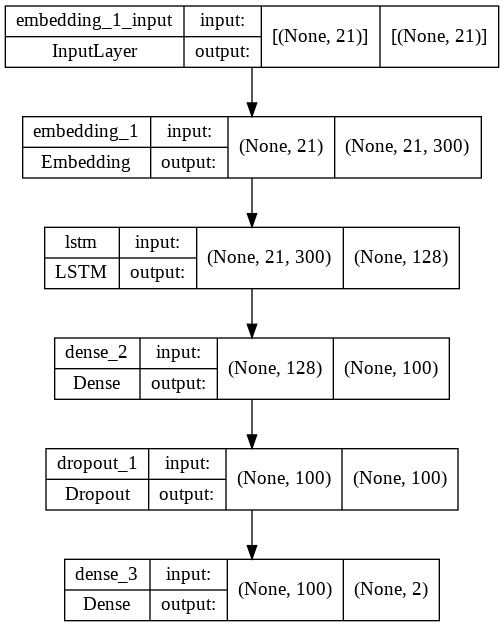

In [ ]:
from tensorflow.keras.utils import plot_model

plot_model(model_LSTM, to_file='model_plot4a.png', show_shapes=True, show_layer_names=True)

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping
es_callback = EarlyStopping(monitor='val_loss', patience=3)

history_LSTM = model_LSTM.fit(X_train, y_train, batch_size=1024, epochs=100, validation_split=0.3, callbacks=[es_callback], shuffle=False)

#history_LSTM = model_LSTM.fit(X_train, y_train, batch_size=32, epochs=15, verbose=1, validation_split=0.3)

Epoch 1/100
111/111 [==============================] - 61s 531ms/step - loss: 0.4396 - accuracy: 0.7915 - val_loss: 0.3530 - val_accuracy: 0.8562
Epoch 2/100
111/111 [==============================] - 59s 532ms/step - loss: 0.3442 - accuracy: 0.8596 - val_loss: 0.3277 - val_accuracy: 0.8668
Epoch 3/100
111/111 [==============================] - 61s 553ms/step - loss: 0.3345 - accuracy: 0.8651 - val_loss: 0.3241 - val_accuracy: 0.8695
Epoch 4/100
111/111 [==============================] - 59s 528ms/step - loss: 0.3291 - accuracy: 0.8674 - val_loss: 0.3229 - val_accuracy: 0.8684
Epoch 5/100
111/111 [==============================] - 59s 533ms/step - loss: 0.3243 - accuracy: 0.8698 - val_loss: 0.3179 - val_accuracy: 0.8727
Epoch 6/100
111/111 [==============================] - 59s 534ms/step - loss: 0.3211 - accuracy: 0.8703 - val_loss: 0.3129 - val_accuracy: 0.8733
Epoch 7/100
111/111 [==============================] - 61s 547ms/step - loss: 0.3190 - accuracy: 0.8706 - val_loss: 0.3207 -

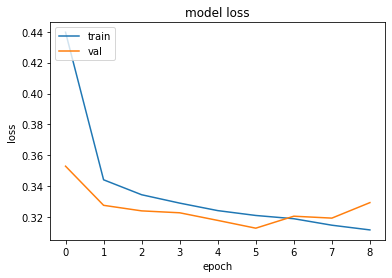

In [ ]:
plt.plot(history_LSTM.history['loss'])
plt.plot(history_LSTM.history['val_loss'])

plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','val'], loc='upper left')

plt.show()

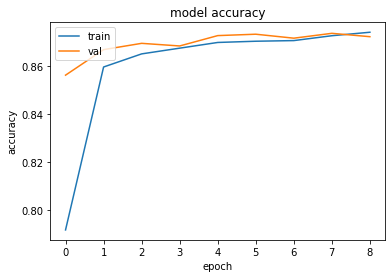

In [ ]:
plt.plot(history_LSTM.history['accuracy'])
plt.plot(history_LSTM.history['val_accuracy'])

plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','val'], loc='upper left')
plt.show()

In [ ]:
score_train = model_LSTM.evaluate(X_train, y_train, verbose=1)
score_test = model_LSTM.evaluate(X_test, y_test, verbose=1)

1259/1259 [==============================] - 16s 13ms/step - loss: 0.3367 - accuracy: 0.8677


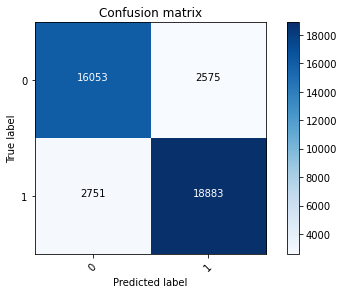

In [ ]:
# Look at confusion matrix 
import itertools  

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Predict the values from the validation dataset
Y_pred = model_LSTM.predict(X_test)
# Convert predictions classes to one hot vectors 
Y_pred_classes = np.argmax(Y_pred,axis = 1) 
# Convert validation observations to one hot vectors
Y_true = np.argmax(y_test,axis = 1) 
# compute the confusion matrix
confusion_mtx = confusion_matrix(Y_true, Y_pred_classes) 
# plot the confusion matrix
plot_confusion_matrix(confusion_mtx, classes = range(2)) 

In [ ]:
print ("True Positive:" , (confusion_mtx[0,0]))
print ("True Negative:" , (confusion_mtx[1,1]))
print ("False Positive:" , (confusion_mtx[0,1]))
print ("False Negative:" , (confusion_mtx[1,0]))

True Positive: 16053
True Negative: 18883
False Positive: 2575
False Negative: 2751


In [ ]:
print(classification_report(Y_true, Y_pred_classes))

              precision    recall  f1-score   support

           0       0.85      0.86      0.86     18628
           1       0.88      0.87      0.88     21634

    accuracy                           0.87     40262
   macro avg       0.87      0.87      0.87     40262
weighted avg       0.87      0.87      0.87     40262



#pemodelan bidirectional

In [ ]:
model_Bidirectional = Sequential()

model_Bidirectional.add(Embedding(vocab_size, 300,input_length=max_length, trainable=False))
model_Bidirectional.add(Bidirectional(LSTM(128)))
model_Bidirectional.add(Dense(100,activation='relu'))
model_Bidirectional.add(Dropout(0.4))
model_Bidirectional.add(Dense(2,activation='sigmoid'))
model_Bidirectional.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model_Bidirectional.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, 21, 300)           10233000  
                                                                 
 bidirectional (Bidirectiona  (None, 256)              439296    
 l)                                                              
                                                                 
 dense_4 (Dense)             (None, 100)               25700     
                                                                 
 dropout_2 (Dropout)         (None, 100)               0         
                                                                 
 dense_5 (Dense)             (None, 2)                 202       
                                                                 
Total params: 10,698,198
Trainable params: 465,198
Non-trainable params: 10,233,000
____________________________________

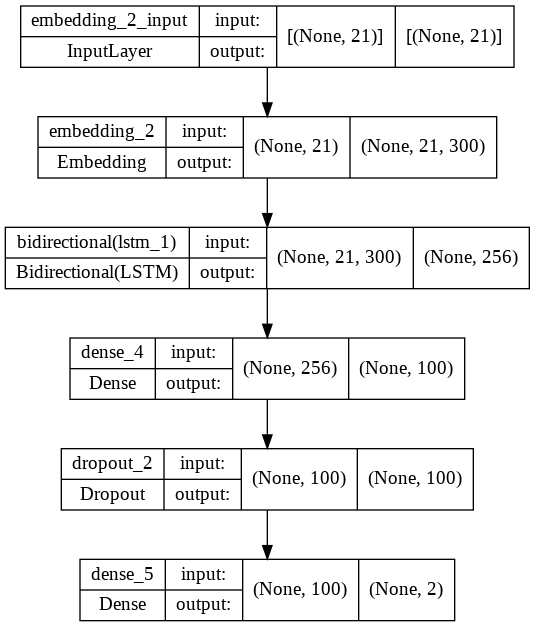

In [ ]:
from tensorflow.keras.utils import plot_model

plot_model(model_Bidirectional, to_file='model_plot4a.png', show_shapes=True, show_layer_names=True)

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping
es_callback = EarlyStopping(monitor='val_loss', patience=3)

history_Bidirectional = model_Bidirectional.fit(X_train, y_train, batch_size=1024,
          epochs=100, validation_split=0.3, callbacks=[es_callback], shuffle=False)

Epoch 1/100
111/111 [==============================] - 118s 1s/step - loss: 0.4873 - accuracy: 0.7704 - val_loss: 0.3515 - val_accuracy: 0.8543
Epoch 2/100
111/111 [==============================] - 112s 1s/step - loss: 0.3469 - accuracy: 0.8594 - val_loss: 0.3295 - val_accuracy: 0.8653
Epoch 3/100
111/111 [==============================] - 114s 1s/step - loss: 0.3333 - accuracy: 0.8653 - val_loss: 0.3233 - val_accuracy: 0.8677
Epoch 4/100
111/111 [==============================] - 112s 1s/step - loss: 0.3240 - accuracy: 0.8677 - val_loss: 0.3183 - val_accuracy: 0.8696
Epoch 5/100
111/111 [==============================] - 114s 1s/step - loss: 0.3204 - accuracy: 0.8693 - val_loss: 0.3126 - val_accuracy: 0.8720
Epoch 6/100
111/111 [==============================] - 113s 1s/step - loss: 0.3170 - accuracy: 0.8707 - val_loss: 0.3128 - val_accuracy: 0.8727
Epoch 7/100
111/111 [==============================] - 115s 1s/step - loss: 0.3115 - accuracy: 0.8741 - val_loss: 0.3074 - val_accuracy:

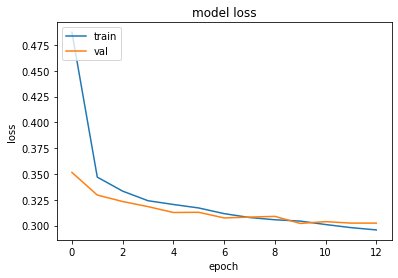

In [ ]:
plt.plot(history_Bidirectional.history['loss'])
plt.plot(history_Bidirectional.history['val_loss'])

plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','val'], loc='upper left')

plt.show()

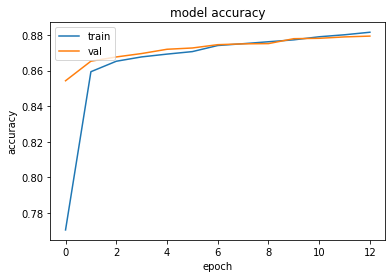

In [ ]:
plt.plot(history_Bidirectional.history['accuracy'])
plt.plot(history_Bidirectional.history['val_accuracy'])

plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','val'], loc='upper left')
plt.show()

In [ ]:
score_train = model_Bidirectional.evaluate(X_train, y_train, verbose=1)
score_test = model_Bidirectional.evaluate(X_test, y_test, verbose=1)

1259/1259 [==============================] - 31s 24ms/step - loss: 0.3084 - accuracy: 0.8773


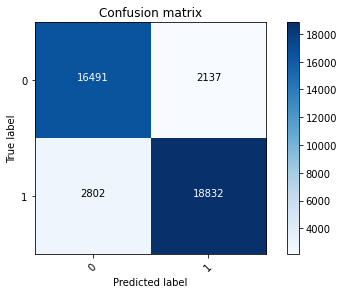

In [ ]:
# Look at confusion matrix 
import itertools  

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Predict the values from the validation dataset
Y_pred = model_Bidirectional.predict(X_test)
# Convert predictions classes to one hot vectors 
Y_pred_classes = np.argmax(Y_pred,axis = 1) 
# Convert validation observations to one hot vectors
Y_true = np.argmax(y_test,axis = 1) 
# compute the confusion matrix
confusion_mtx = confusion_matrix(Y_true, Y_pred_classes) 
# plot the confusion matrix
plot_confusion_matrix(confusion_mtx, classes = range(2)) 

In [ ]:
print(classification_report(Y_true, Y_pred_classes))

              precision    recall  f1-score   support

           0       0.85      0.89      0.87     18628
           1       0.90      0.87      0.88     21634

    accuracy                           0.88     40262
   macro avg       0.88      0.88      0.88     40262
weighted avg       0.88      0.88      0.88     40262

